In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../data_collection/data/labelled/masters_data_programs_india_usa.csv")
df.head(3)

,uni_name,pgm_name,dur_yrs,type,national_rank_qs,dept_involved,location,url,descr,header_tag,...,Data Representation and Transformation,Computing with Data,Data Modeling,Data Visualization and Presentation,Science about Data Science,Not determinable,country,gds_mean,gds_stdev,band
0,Indian Institute of Science Bangalore,M.Tech. Computational and Data Science,2,Public,2,Department of Computational and Data Sciences,Karnataka,http://cds.iisc.ac.in/admissions/course-degrees/,Computational Science and Data Science are int...,"['h1', 'h2', 'h3']",...,0.272727,0.454545,0.090909,0.090909,0.000000,0.0,India,0.166667,0.166804,Band 3
1,Indian Institute of Science Bangalore,M.Tech. Artificial Intelligence,2,Public,2,Departments of Computer Science and Automation...,Karnataka,https://eecs.iisc.ac.in/mtechai/,Artificial Intelligence has captured the ima...,"['h1', 'h2']",...,0.235294,0.470588,0.294118,0.000000,0.000000,0.0,India,0.166667,0.198321,Band 3
2,University of Hyderabad,MBA Business Analytics,2,Public,8,School of Management Studies,Telangana,https://smsuoh.ac.in/mba/mba-business-analytics/,The School has launched a two year MBA in Bus...,"['h2', 'h4']",...,0.185714,0.357143,0.157143,0.157143,0.014286,0.0,India,0.166667,0.110902,Band 2


In [4]:
df.describe()

,national_rank_qs,"Data Gathering, Preparation and Exploration",Data Representation and Transformation,Computing with Data,Data Modeling,Data Visualization and Presentation,Science about Data Science,Not determinable,gds_mean,gds_stdev
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.0,1.110000e+02,111.000000
mean,24.828829,0.127391,0.186566,0.343805,0.201364,0.124772,0.016102,0.0,1.666667e-01,0.119966
std,13.793196,0.052475,0.053621,0.094965,0.058929,0.061370,0.026333,0.0,5.576290e-17,0.043468
min,1.000000,0.000000,0.071429,0.200000,0.000000,0.000000,0.000000,0.0,1.666667e-01,0.051747
25%,15.000000,0.095238,0.162476,0.260582,0.166667,0.084524,0.000000,0.0,1.666667e-01,0.085617
50%,23.000000,0.133333,0.185714,0.333333,0.194444,0.138889,0.000000,0.0,1.666667e-01,0.111803
75%,39.000000,0.166667,0.204167,0.418011,0.230769,0.173163,0.032258,0.0,1.666667e-01,0.148763
max,49.000000,0.240000,0.500000,0.700000,0.428571,0.227273,0.125000,0.0,1.666667e-01,0.273252


In [ ]:
df[df.country=="India"].describe()

,national_rank_qs,"Data Gathering, Preparation and Exploration",Data Representation and Transformation,Computing with Data,Data Modeling,Data Visualization and Presentation,Science about Data Science,Not determinable
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0
mean,28.933333,0.090070,0.208684,0.418178,0.184513,0.081976,0.016579,0.0
std,13.952959,0.050446,0.069452,0.084320,0.068993,0.056793,0.024061,0.0
min,2.000000,0.000000,0.083333,0.245614,0.000000,0.000000,0.000000,0.0
25%,21.500000,0.074786,0.175000,0.375845,0.158398,0.030688,0.000000,0.0
50%,28.000000,0.095238,0.200000,0.412281,0.193996,0.093074,0.000000,0.0
75%,41.000000,0.126995,0.226608,0.460440,0.223703,0.130942,0.030950,0.0
max,49.000000,0.175439,0.500000,0.700000,0.294118,0.175439,0.083333,0.0


In [ ]:
df[df.country=="USA"].describe()

,national_rank_qs,"Data Gathering, Preparation and Exploration",Data Representation and Transformation,Computing with Data,Data Modeling,Data Visualization and Presentation,Science about Data Science,Not determinable
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.0
mean,23.308642,0.141214,0.178374,0.316259,0.207606,0.140622,0.015925,0.0
std,13.504297,0.046346,0.044198,0.083549,0.053884,0.055391,0.027267,0.0
min,1.000000,0.000000,0.071429,0.200000,0.066667,0.000000,0.000000,0.0
25%,15.000000,0.111111,0.157895,0.250000,0.176471,0.111111,0.000000,0.0
50%,21.000000,0.153846,0.181818,0.282609,0.195652,0.156250,0.000000,0.0
75%,34.000000,0.166667,0.200000,0.375000,0.230769,0.181818,0.032258,0.0
max,48.000000,0.240000,0.333333,0.533333,0.428571,0.227273,0.125000,0.0


In [5]:
df[df.uni_name=="Indian Institute of Science Bangalore"]

,uni_name,pgm_name,dur_yrs,type,national_rank_qs,dept_involved,location,url,descr,header_tag,...,Data Representation and Transformation,Computing with Data,Data Modeling,Data Visualization and Presentation,Science about Data Science,Not determinable,country,gds_mean,gds_stdev,band
0,Indian Institute of Science Bangalore,M.Tech. Computational and Data Science,2,Public,2,Department of Computational and Data Sciences,Karnataka,http://cds.iisc.ac.in/admissions/course-degrees/,Computational Science and Data Science are int...,"['h1', 'h2', 'h3']",...,0.272727,0.454545,0.090909,0.090909,0.0,0.0,India,0.166667,0.166804,Band 3
1,Indian Institute of Science Bangalore,M.Tech. Artificial Intelligence,2,Public,2,Departments of Computer Science and Automation...,Karnataka,https://eecs.iisc.ac.in/mtechai/,Artificial Intelligence has captured the ima...,"['h1', 'h2']",...,0.235294,0.470588,0.294118,0.000000,0.0,0.0,India,0.166667,0.198321,Band 3


<AxesSubplot:xlabel='gds_stdev', ylabel='Density'>

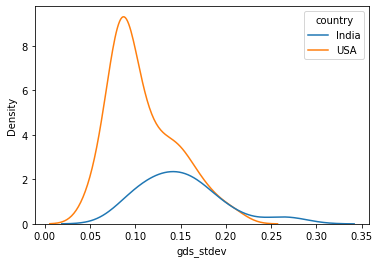

In [6]:
sns.kdeplot(data = df, x="gds_stdev", hue= "country")

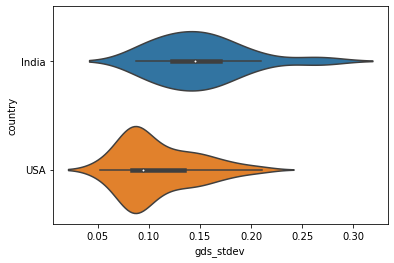

In [7]:
sns.violinplot(data = df, x = "gds_stdev", y='country')
plt.show()

In [9]:
df_for_sdev = df[['uni_name', 'pgm_name', 'gds_stdev', 'country']]
df_for_sdev['id'] = df['uni_name'] + " - " + df['pgm_name']

<ipython-input-9-e4a2c653a3bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_sdev['id'] = df['uni_name'] + " - " + df['pgm_name']


In [10]:
def assign_color(x, word):

    if word in x.lower():
        return 'red'
    return 'blue'

In [11]:
df_for_sdev['color'] = df_for_sdev.country.apply(lambda x: assign_color(x, 'india'))

<ipython-input-11-147d68ec38d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_sdev['color'] = df_for_sdev.country.apply(lambda x: assign_color(x, 'india'))


In [12]:
df_for_sdev = df_for_sdev.sort_values(by='gds_stdev', ascending=False)

<BarContainer object of 111 artists>

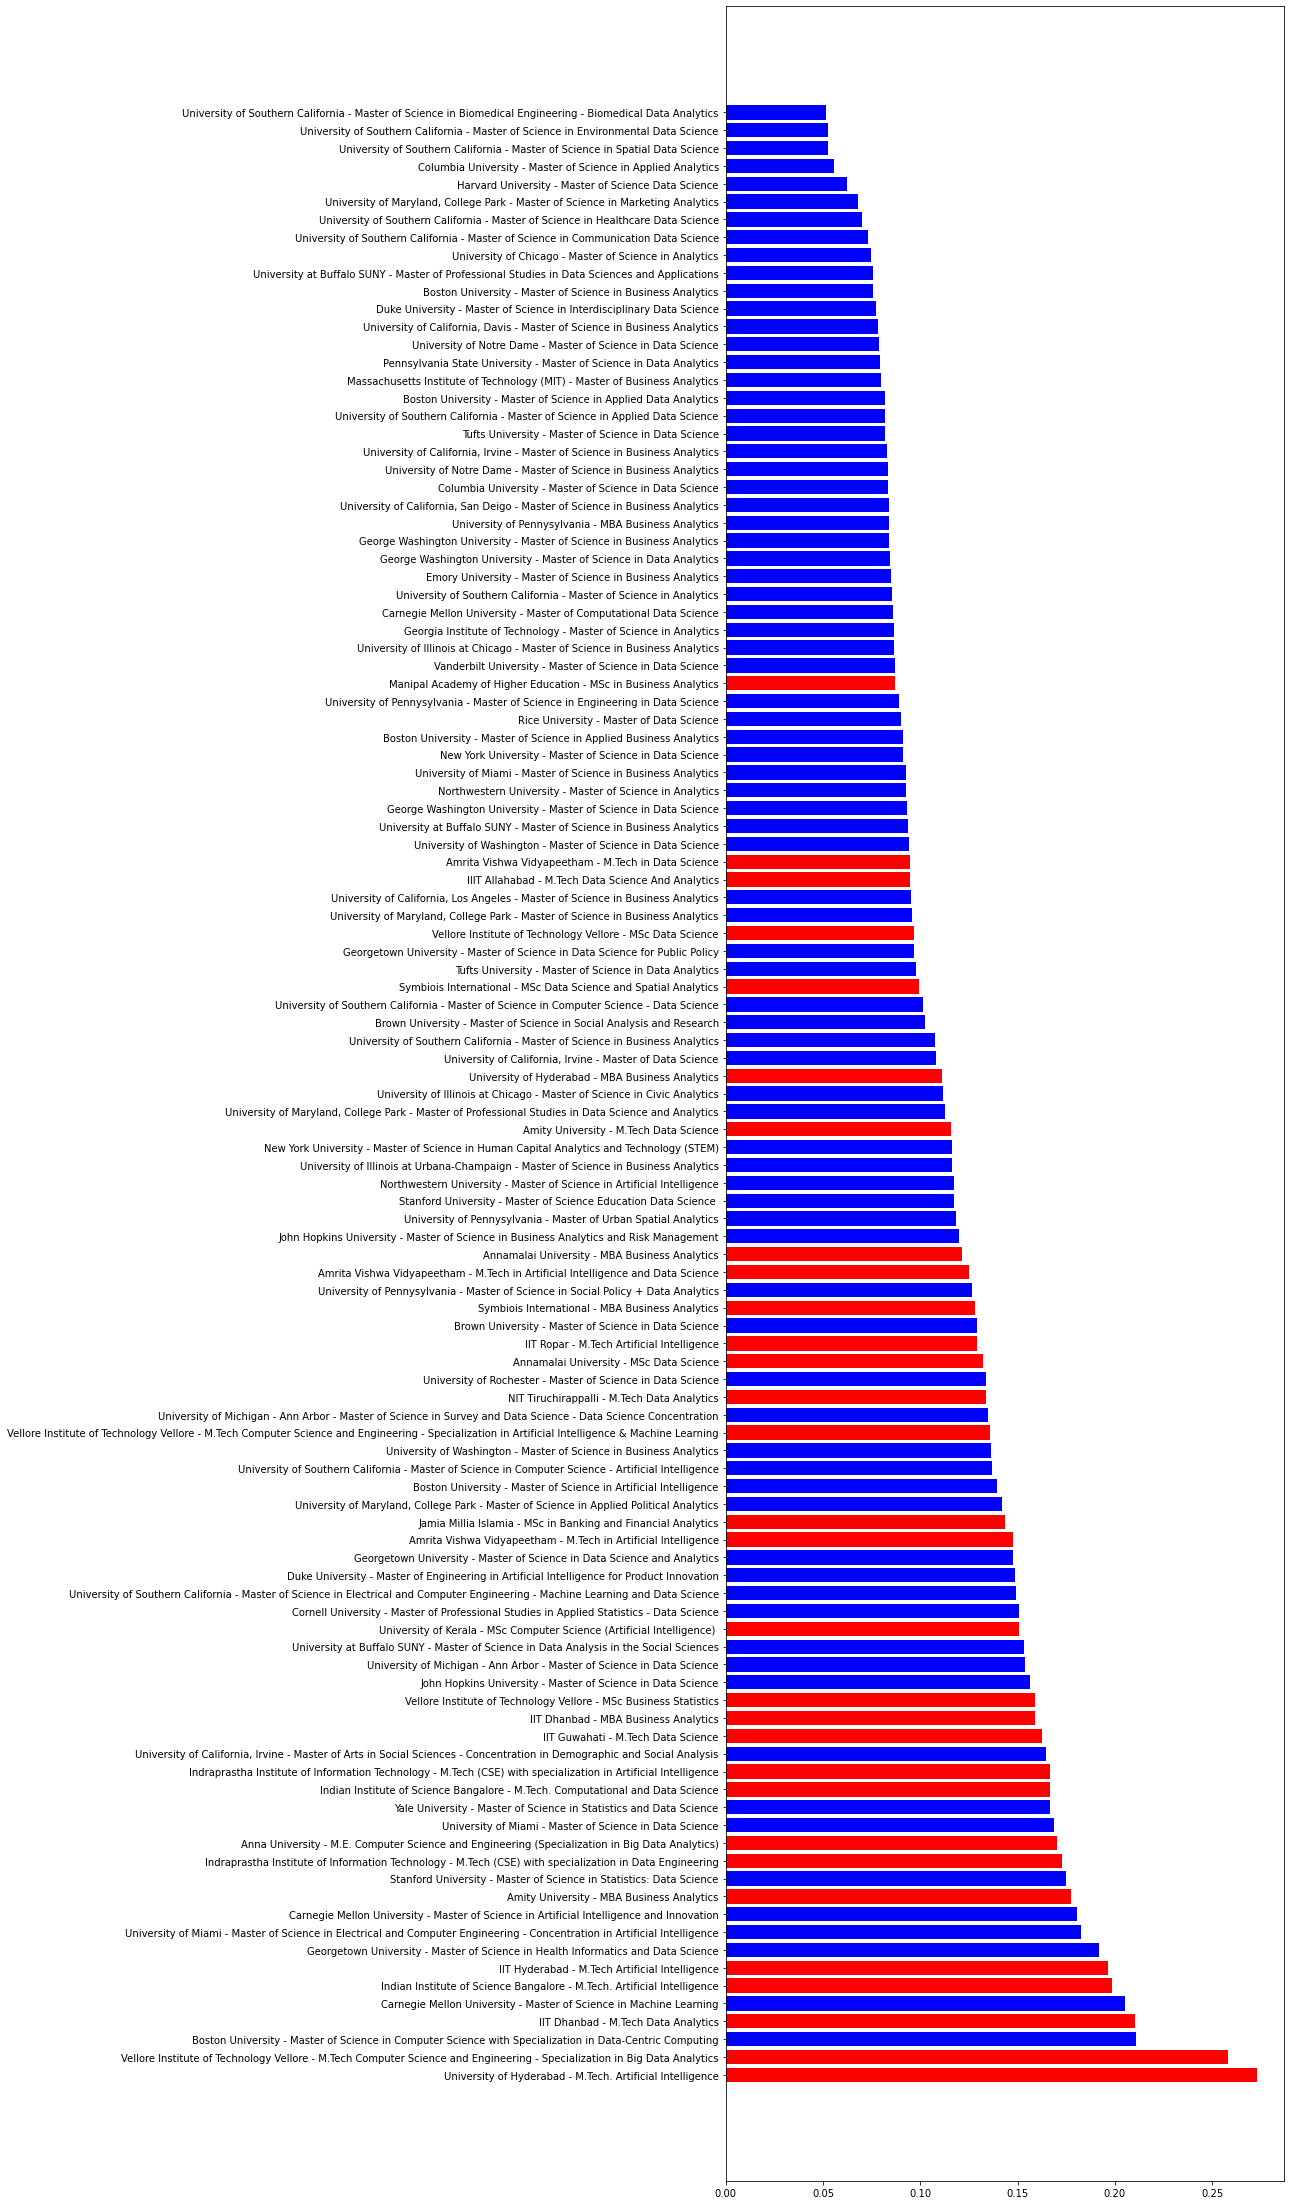

In [13]:
plt.figure(figsize=(10,40))
plt.barh(y=df_for_sdev['id'], width=df_for_sdev['gds_stdev'], color=df_for_sdev['color'])

<AxesSubplot:xlabel='band', ylabel='count'>

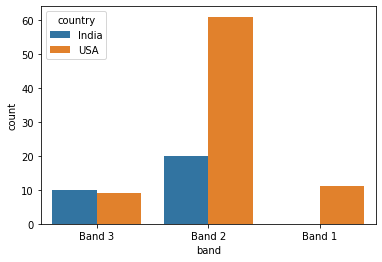

In [14]:
sns.countplot(data=df, x='band', hue='country')